In [28]:
import tensorflow as tf 
from tensorflow.keras import  datasets,layers,models
import matplotlib.pyplot as plt 
import numpy as np 


In [29]:
(X_train,y_train),(X_test,y_test) =  datasets.cifar100.load_data()

In [30]:
X_train.shape

(50000, 32, 32, 3)

In [31]:
y_train[:5]

array([[19],
       [29],
       [ 0],
       [11],
       [ 1]])

In [32]:
y_train = y_train.reshape(-1,)
y_train[:5]


array([49, 33, 72, 51, 71])

In [ ]:
y_test = y_test.reshape(-1,)

In [33]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [34]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

TypeError: only integer scalar arrays can be converted to a scalar index

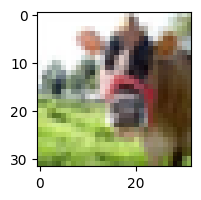

In [36]:
plot_sample(X_train, y_train, 0)